In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import time

In [ ]:
# B_FLUX_APER2, V_FLUX_APER2, r_FLUX_APER2 #Optical and NIR 
# 'MB', 'MV', 'MR', 'MI', 'MZ' #Absoulte magnitude

'ZPDF', 'B_FLUX_APER2', 'V_FLUX_APER2', 'r_FLUX_APER2', 'MB', 'MV', 'MR', 'MI', 'MZ'

In [10]:
# Open the FITS file
hdul = fits.open('COSMOS2015_Laigle+_v1.1.fits')

fits_data = hdul[1].data
random_indices = np.random.choice(len(fits_data), size=50000, replace=False)
data = fits_data[random_indices]

column_names = ['ALPHA_J2000', 'DELTA_J2000', 'ZPDF']  # Replace with the actual column names

# Create a dictionary to store the column data
column_data = {}
for column_name in column_names:
    column_data[column_name] = data[column_name]

# Create a DataFrame
df = pd.DataFrame(column_data)

# Close the FITS file
hdul.close()

In [ ]:
# Open the FITS file
hdul = fits.open('COSMOS2015_Laigle+_v1.1.fits')

# Select the desired columns
data = hdul[1].data[:5000]  # Assuming the desired data is in the second extension
column_names = ['ALPHA_J2000', 'DELTA_J2000']  # Replace with the actual column names

# Create a dictionary to store the column data
column_data = {}
for column_name in column_names:
    column_data[column_name] = data[column_name]

# Create a DataFrame
df = pd.DataFrame(column_data)

# Close the FITS file
hdul.close()

In [14]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

# Accessing the PCA components
component_1 = pca.components_[0]
component_2 = pca.components_[1]

print("PCA Component 1:")
print(component_1)

print("\nPCA Component 2:")
print(component_2)


PCA Component 1:
[-2.06654905e-04  6.17339755e-04 -4.37460358e-01 -8.99237461e-01]

PCA Component 2:
[-2.11395620e-04  6.87229492e-04 -8.99237214e-01  4.37460759e-01]


In [ ]:
# Perform clustering using K-means for different values of k
wcss = []
for k in range(1, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS against the number of clusters
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Perform clustering using K-means for different values of k
silhouette_scores = []
for k in range(2, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_pca, labels))

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

C:\Users\Gustav\anaconda3\envs\AML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


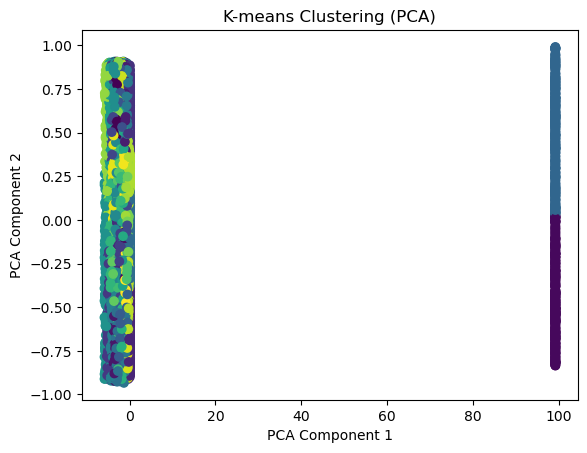

In [12]:
# Perform clustering using K-means
kmeans = KMeans(n_clusters=50)  # Set the number of clusters as desired
kmeans.fit(data_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clustering results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA)')
plt.show()

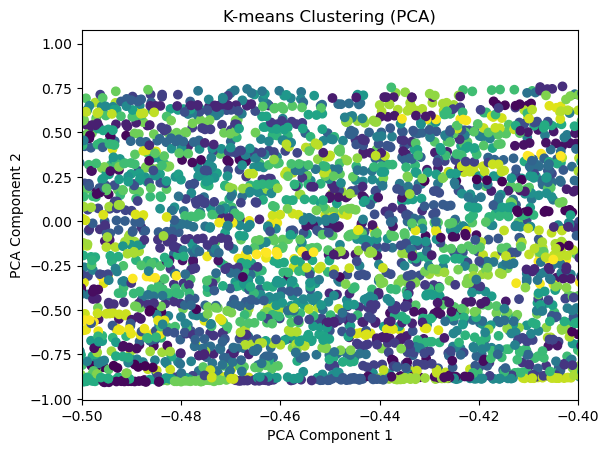

In [9]:
# Visualize the clustering results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (PCA)')
plt.xlim(-0.5,-0.4)
plt.show(-0.5,-0.4)